In [134]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

In [135]:
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')

import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots

In [136]:
# Define parameters
N= 13
lmd = 0.02272
J = 0.5

#Example states
# 2 QUBIT
#state_dictionary = {"11":1}
#state_dictionary = {"11":1, "00":1}
#state_dictionary = {"11":-1, "00":1, "01":1, "10":1} #C2  
 
# 3 QUBIT
#state_dictionary = {"111":1, "000":1}                    # GHZ
#state_dictionary = {"001":1, "010":1, "100":1}           # W
state_dictionary = {"000":1, "011":1, "101":1, "110":1}  # CLUSTER

ti = 0
tf = np.pi/lmd
Nsteps = 5000

In [137]:
initial_state = md.create_domain_wall_state(state_dictionary, register= "Alice", one_step=True)
final_state   = md.create_domain_wall_state(state_dictionary, register= "Bob",   one_step=True)

register_size = len(initial_state.dims[0])

initial_chain = md.initialize_general_system(N, initial_state, register='Alice')
final_chain =   md.initialize_general_system(N, final_state,   register='Bob'  )

In [138]:
H_t = Ham.Hamiltonian(system_size = N,
                    mode = "transport",
                    lambda_factor = lmd,
                    global_J = J
                    )

In [139]:
# test that algorithm works well without errors
fidelity, magnetizations, corrected_fidelity = dyn.OneStepAlgorithm(initial_chain, final_chain, H_t, ti, tf, Nsteps, factor = 1.1)
filename = dh.create_data_filename(N, J, lmd, state_dictionary, base_name="fidelity")

print(filename)

fidelity_N13_J0.5_L0.023_000_1_011_1_101_1_20251023_123727


0.9867219826916501


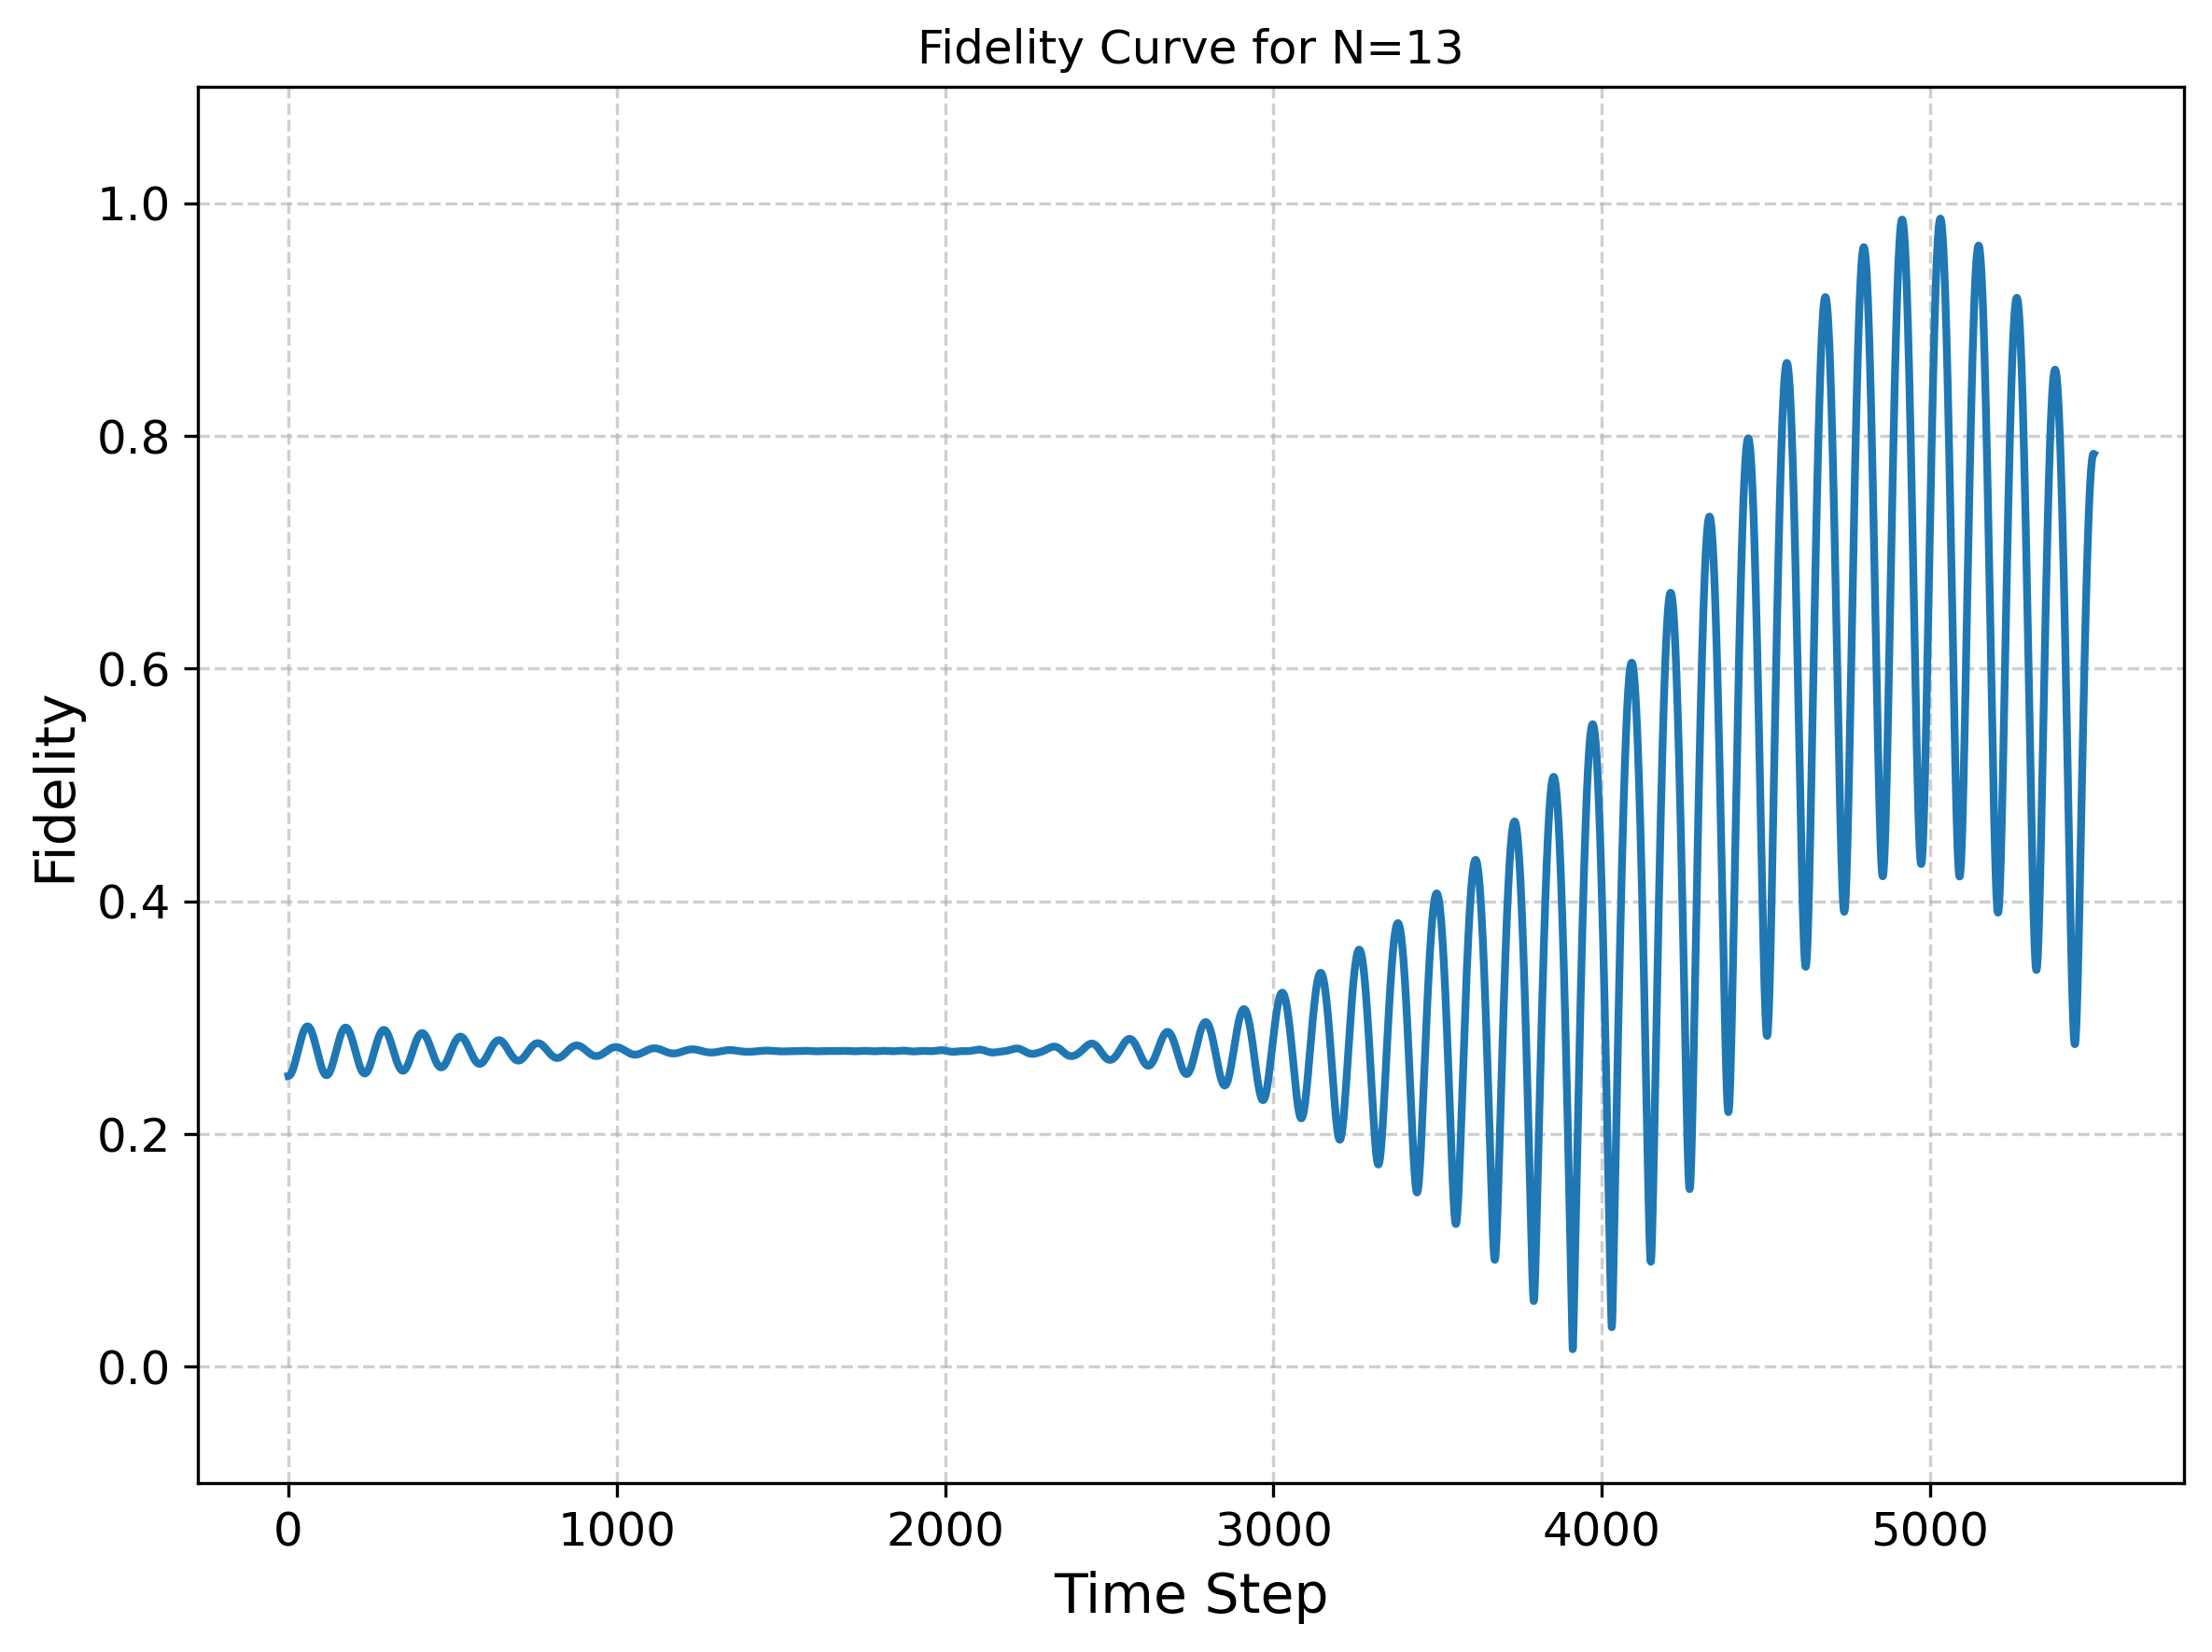

In [140]:
print(max(fidelity))
plots.plot_fidelity(fidelity, N)

In [ ]:
# print(filename)
# dh.save_numpy_array(fidelity, f'../../files/data_files/fidelity/paper_revision/{filename}')

fidelity_N13_J0.5_L0.023_000_1_011_1_101_1_20251023_123727
Data successfully saved to: ../../files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_000_1_011_1_101_1_20251023_123727.npy


In [142]:
print(filename)

fidelity_N13_J0.5_L0.023_000_1_011_1_101_1_20251023_123727


In [ ]:
from pathlib import Path

def find_files_by_extension(folder_path, extension):
    """
    Scans a folder and prints all files with the specified extension (full paths).
    
    :param folder_path: (str) Path to the folder to scan
    :param extension: (str) File extension to look for
    """
    folder = Path(folder_path)
    
    # Check if folder exists
    if not folder.exists():
        print(f"Error: Folder '{folder_path}' does not exist.")
        return
    if not folder.is_dir():
        print(f"Error: '{folder_path}' is not a directory.")
        return
    
    print(f"Files with extension '{extension}' in '{folder_path}':")
    print("-" * 50)
    
    # Find all files with the extension
    pattern = f"*{extension}" if extension.startswith('.') else f"*.{extension}"
    found_files = list(folder.glob(pattern))
    
    for file_path in found_files:
        if file_path.is_file():
            print(file_path.absolute())  # Full absolute path
    
    if not found_files:
        print(f"No files with extension '{extension}' found.")
    else:
        print(f"\nTotal files found: {len(found_files)}")

In [149]:
find_files_by_extension('../../files/data_files/fidelity/paper_revision/', '.npy')


Files with extension '.npy' in '../../files/data_files/fidelity/paper_revision/':
--------------------------------------------------
/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/notebooks/../../files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_001_1_010_1_100_1_20251023_123705.npy
/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/notebooks/../../files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_111_1_000_1_20251023_123632.npy
/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/notebooks/../../files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_000_1_011_1_101_1_20251023_123727.npy
/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/notebooks/../../files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_11_-1_00_1_01_1_20251023_123601.npy
/Users/omichel/Desktop/qilimanjaro/projects/quantum_tra

In [154]:
fidelity_11        = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_11_1_20251023_123506')
fidelity_bell      = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_11_1_00_1_20251023_123534')
fidelity_cluster_2 = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_11_-1_00_1_01_1_20251023_123601')
fidelity_ghz       = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_111_1_000_1_20251023_123632')
fidelity_w         = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_001_1_010_1_100_1_20251023_123705')
fidelity_cluster_3 = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/data_files/fidelity/paper_revision/fidelity_N13_J0.5_L0.023_000_1_011_1_101_1_20251023_123727')

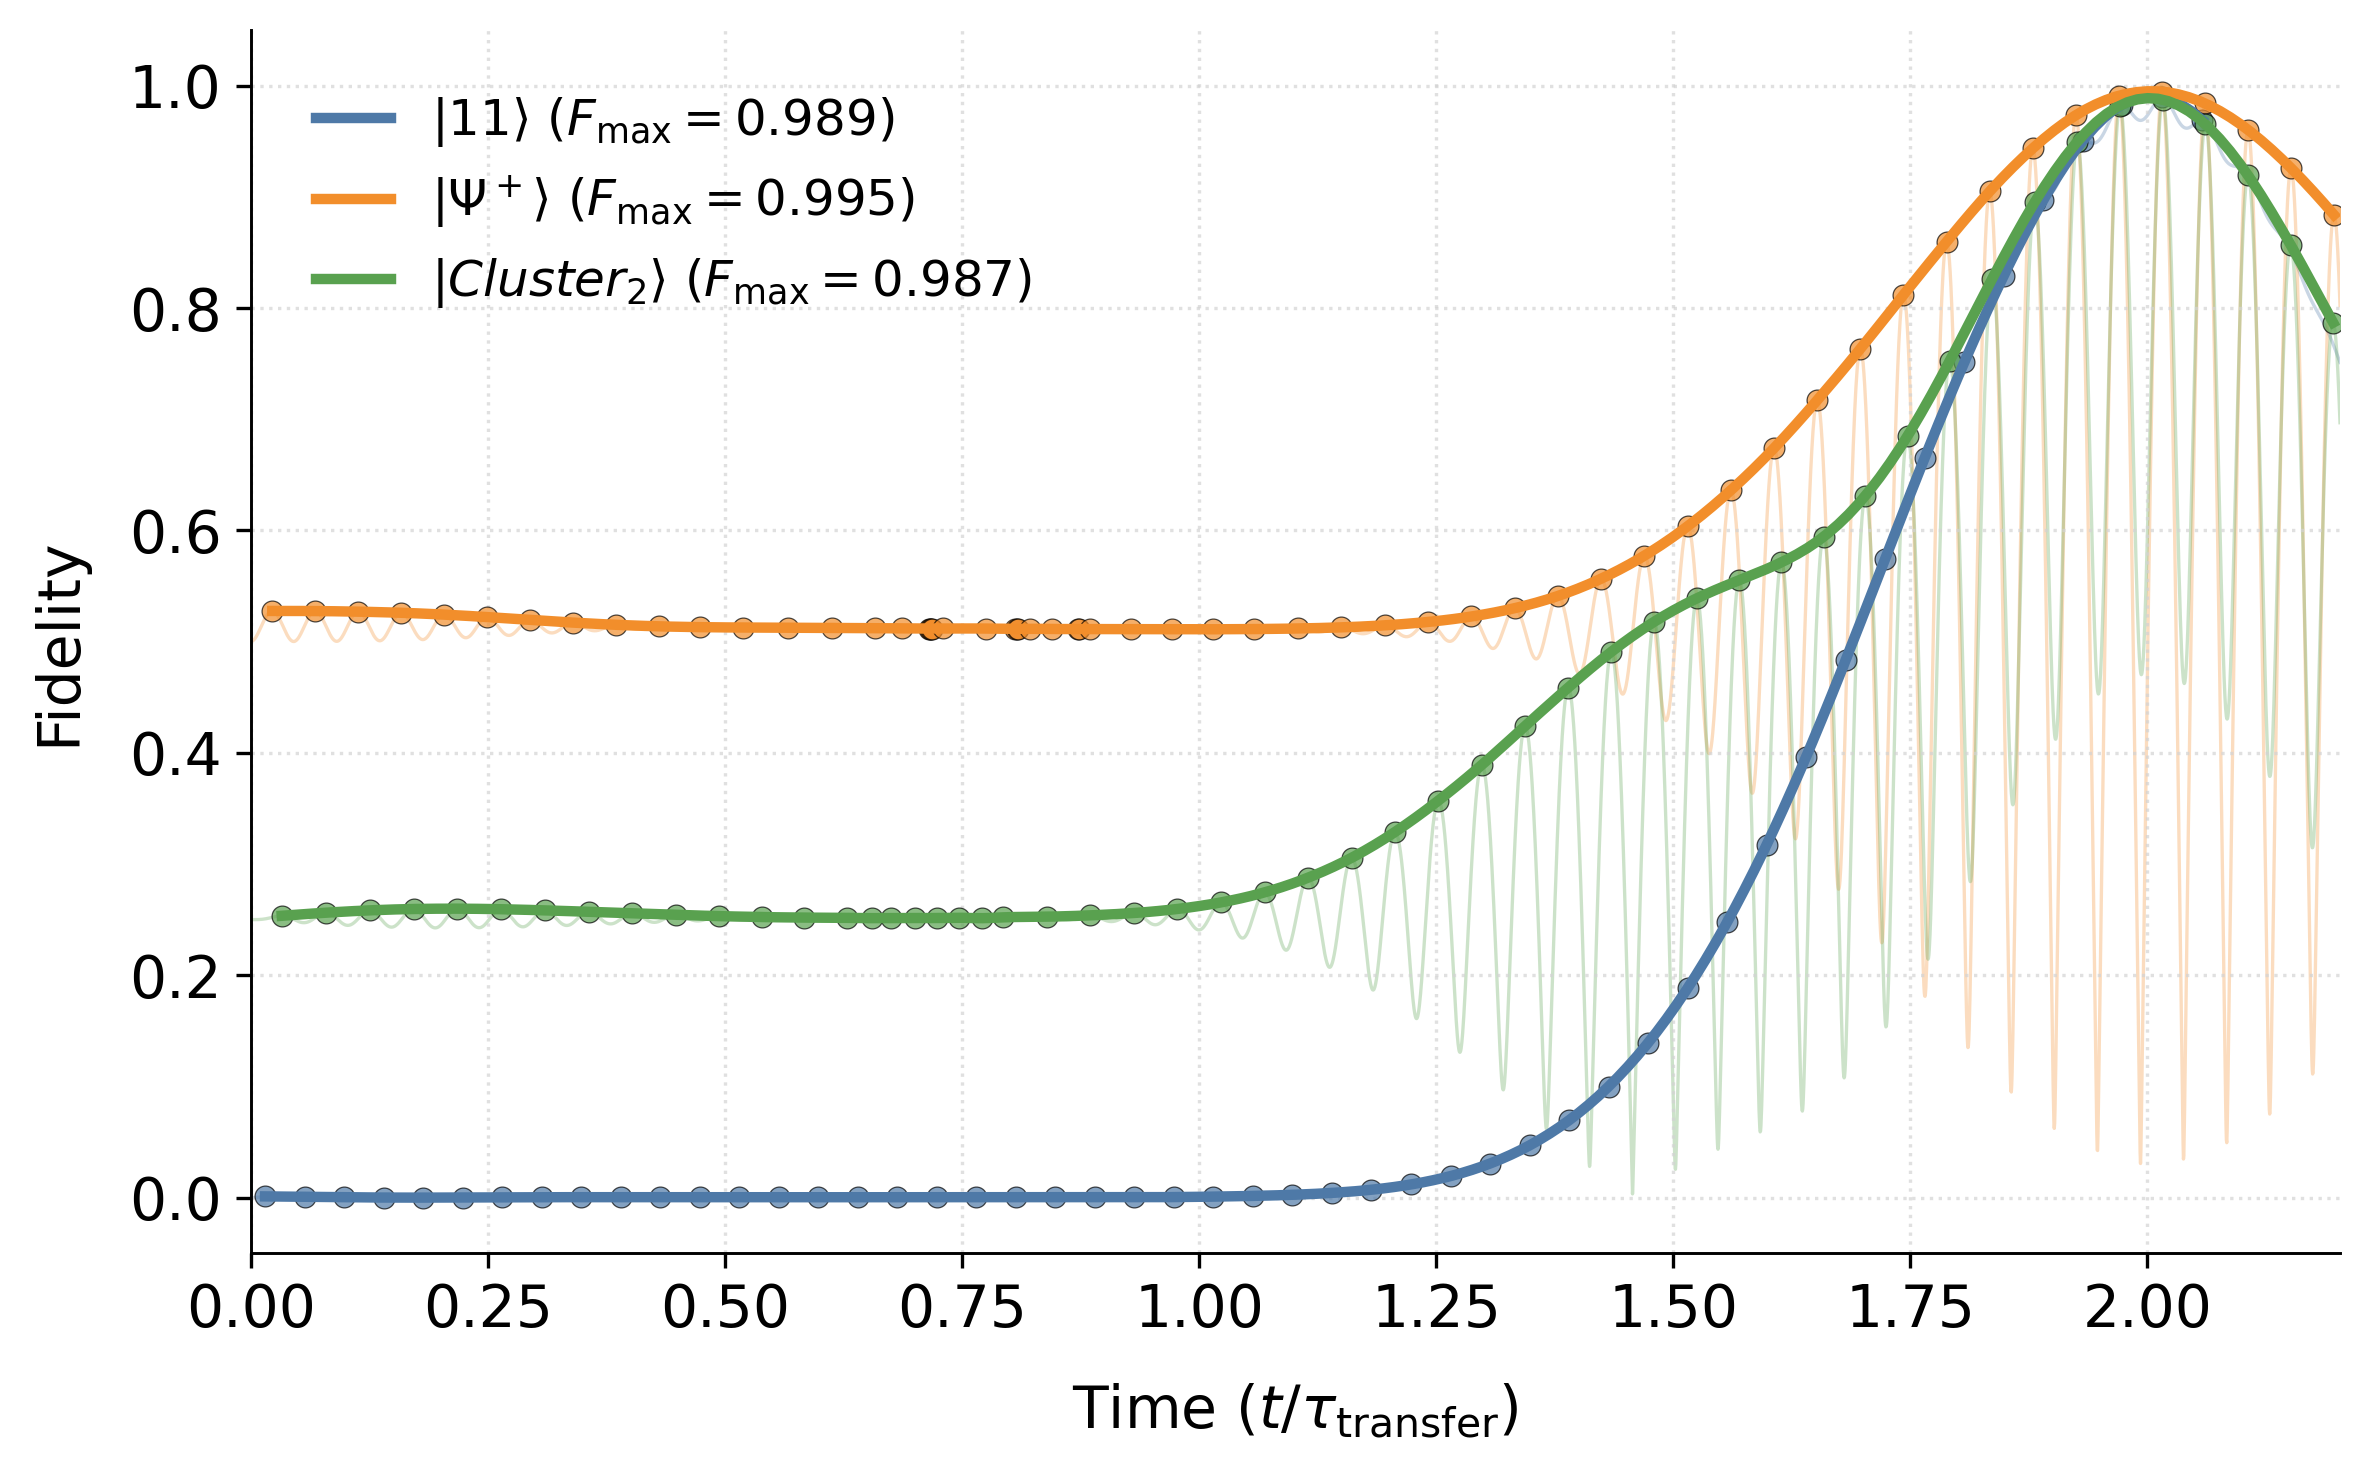

In [158]:
plots.plot_three_fidelity_curves(
    num_steps=len(fidelity_cluster_3),
    fidelity_data_list=[fidelity_11, fidelity_bell, fidelity_cluster_2],
    labels=[r'$|11\rangle$', r'$|\Psi^+\rangle$', r'$|Cluster_2\rangle$'],
    min_peak_height=0.25,
    filepath="/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/figures/fidelity/paper_revision/2_qubit"

)

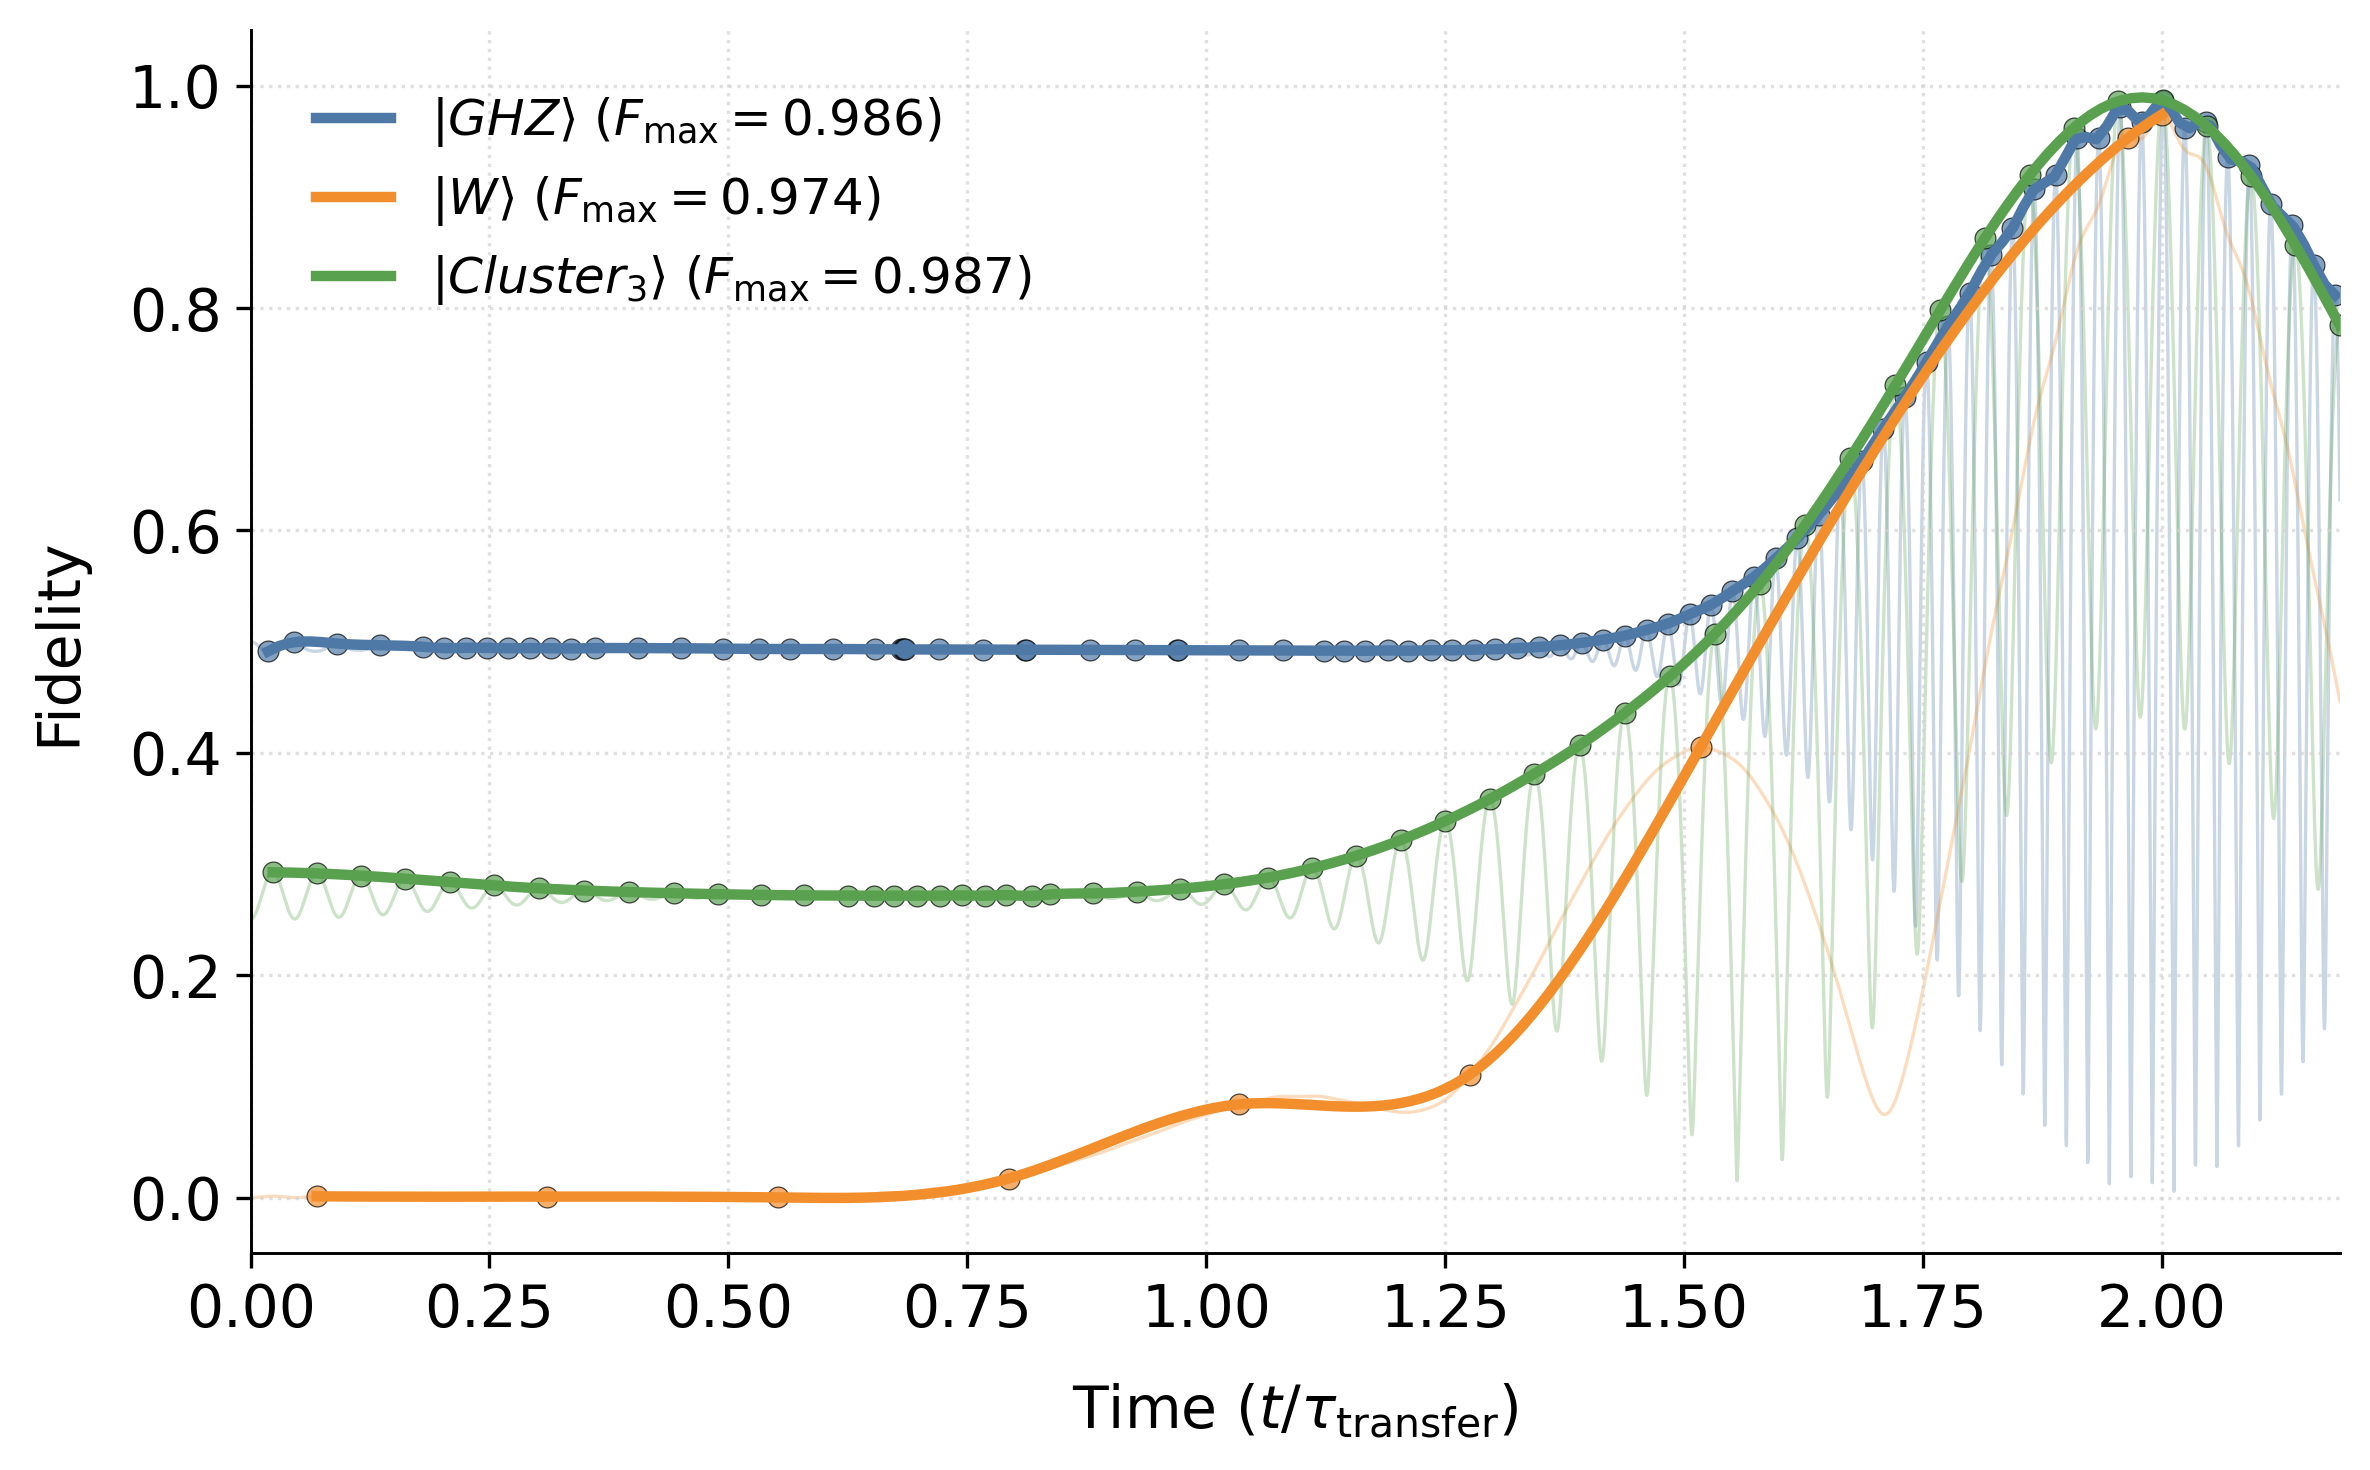

In [161]:
plots.plot_three_fidelity_curves(
    num_steps=len(fidelity_cluster_3),
    fidelity_data_list=[fidelity_ghz, fidelity_w, fidelity_cluster_3],
    labels=[r'$|GHZ\rangle$', r'$|W\rangle$', r'$|Cluster_3\rangle$'],
    min_peak_height=0.25,
    filepath="/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/files/figures/fidelity/paper_revision/3_qubit"

)